<a href="https://colab.research.google.com/github/AtharvaAnupWasnik3021/-Antimatter-vs-Matter-Classification-using-Physics-Inspired-Features-and-Ensemble-Learning/blob/main/MLLAB5Pt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#A4 Perform k-means clustering on your data. Please remove / ignore the target variable for
#performing clustering. Sample code suggested below.
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# ====== Load Your Dataset ======
df = pd.read_csv("Wmunu.csv")

# ====== Remove Target Variable ======
target_column = 'Q'
X = df.drop(columns=[target_column])

# ====== Train-Test Split (optional for clustering) ======
X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)

# ====== Apply K-Means Clustering ======
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(X_train)

# ====== Outputs ======
print("Cluster labels for training data:")
print(kmeans.labels_)

print("\nCluster centers:")
print(kmeans.cluster_centers_)

Cluster labels for training data:
[0 1 0 ... 0 0 0]

Cluster centers:
[[ 1.72822000e+05  1.74808101e+09  3.79625776e+01 -1.65025704e-03
   2.70650983e-02  6.93516245e+00 -3.64882655e-03  1.64723618e+01
   2.74003742e+01 -1.32555487e-01]
 [ 1.71222600e+05  3.95168103e+08  3.83982328e+01  1.94592562e-03
   2.84664271e-02  7.81068077e+00 -1.49762808e-02  1.56929466e+01
   2.74009010e+01 -1.14359933e-01]]


In [3]:
#A5For the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Index.
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_train, kmeans.labels_)
print("Silhouette Score:", sil_score)
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(X_train, kmeans.labels_)
print("Calinski-Harabasz Score:", ch_score)
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X_train, kmeans.labels_)
print("Davies-Bouldin Index:", db_index)

Silhouette Score: 0.971314775158135
Calinski-Harabasz Score: 2374521.0448833234
Davies-Bouldin Index: 0.03864374550445836


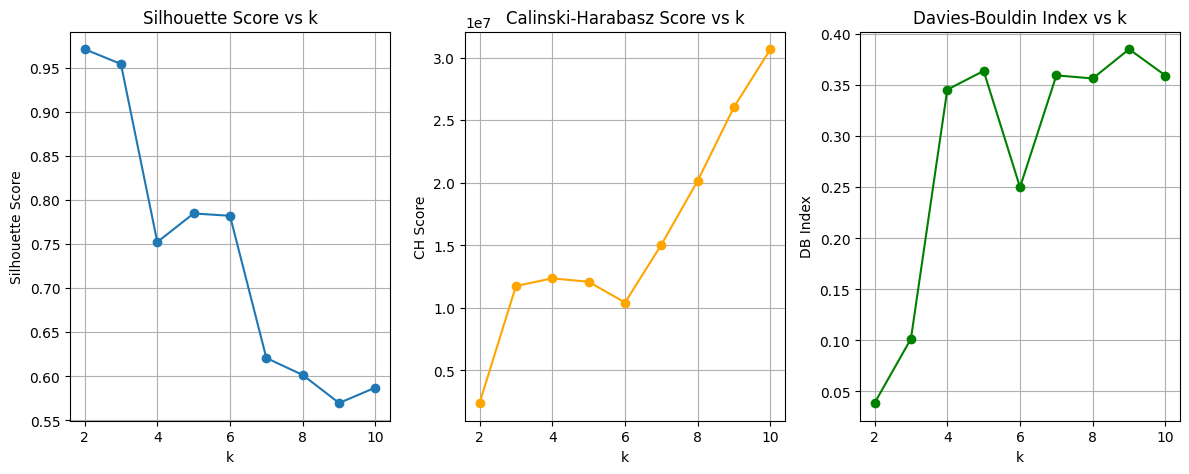

In [4]:
#A6. Perform k-means clustering for different values of k. Evaluate the above scores for each k value.
#Make a plot of the values against the k value to determine the optimal cluster count.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Range of k values to test
k_values = range(2, 11)  # Start from 2 because k=1 silhouette is undefined

sil_scores = []
ch_scores = []
db_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    labels = kmeans.labels_

    sil_scores.append(silhouette_score(X_train, labels))
    ch_scores.append(calinski_harabasz_score(X_train, labels))
    db_scores.append(davies_bouldin_score(X_train, labels))

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(k_values, sil_scores, marker='o')
plt.title('Silhouette Score vs k')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o', color='orange')
plt.title('Calinski-Harabasz Score vs k')
plt.xlabel('k')
plt.ylabel('CH Score')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='o', color='green')
plt.title('Davies-Bouldin Index vs k')
plt.xlabel('k')
plt.ylabel('DB Index')
plt.grid(True)

plt.tight_layout()
plt.show()

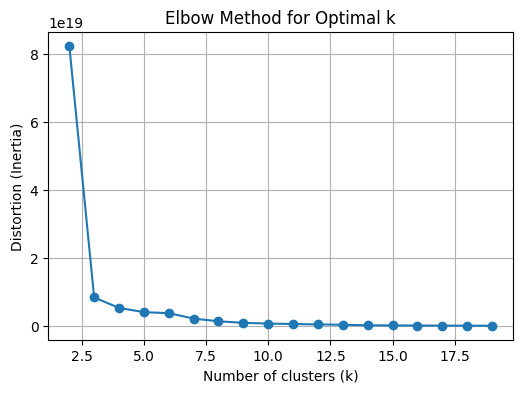

In [5]:
#A7 Using elbow plot, determine the optimal k value for k-means clustering. Use below code.

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions = []
K = range(2, 20)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    distortions.append(kmeans.inertia_)  # inertia_ = sum of squared distances to nearest cluster center
plt.figure(figsize=(6, 4))
plt.plot(K, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.grid(True)
plt.show()